# FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/UT-DS/project01/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

#### **Question 1:** How many rows and columns are present in the data?

In [4]:
print("This dataset has", df.shape[0], "rows and", df.shape[1], "columns.")

This dataset has 1898 rows and 9 columns.


#### Observations:
- The `shape` property of a DataFrame returns a tuple with the number of rows and columns in the DataFrame.

#### **Question 2:** What are the datatypes of the different columns in the dataset?

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- This dataset contains 1 float, 4 int, and 4 object data types.
- There are 1898 non-null values in all the columns, meaning that every column of every row contains a value. However, this does not necessarily mean that there is no missing data. We would require a more in-depth analysis to confirm this.
- The rating column is an object type but should only be numeric values. We will need to look at why the rating column is an object type.

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [25]:
# display null values in dataframe
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
- There are no missing values in the data.

#### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [26]:
# display statistical summary of data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
- The minimum time it takes for food to be prepared is 20 minutes.
- The maximum time it takes for food to be prepared is 35 minutes.
- The average time is takes for food to be prepared is about 27 minutes.

#### **Question 5:** How many orders are not rated?

In [28]:
# show count of null ratings
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
- There are 736 orders that were not rated.

## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### **Question 6:** Explore all the variables and provide observations on their distributions.

#### **Observations on Cost of the Order**

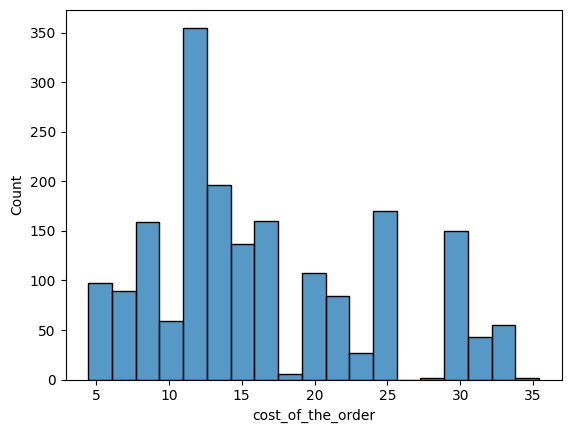

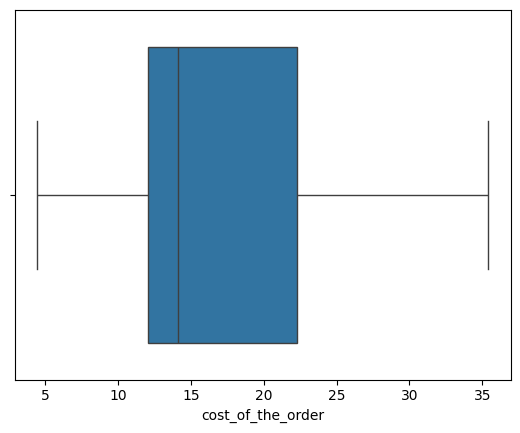

In [ ]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

- The distribution of the cost of orders is slightly right skewed.
- The cost of orders ranges from about 5 dollars to 35 dollars.

#### **Observerations on rating**

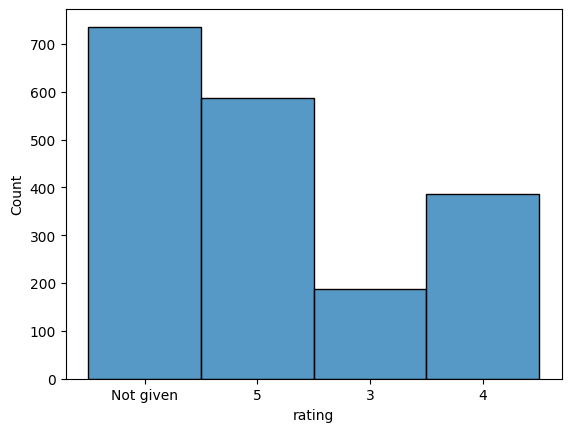

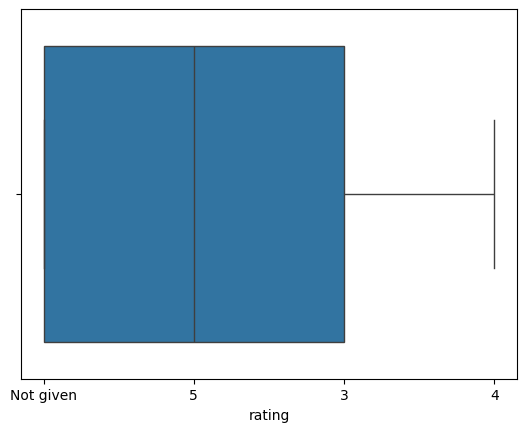

In [29]:
sns.histplot(data=df,x='rating')
plt.show()
sns.boxplot(data=df,x='rating')
plt.show()

- There are no ratings less than 3.
- 50% of the ratings are between 4 and 5.
- The majority of ratings are 5, making the rating column left skewed.

#### **Observations on Food Preparation Time**

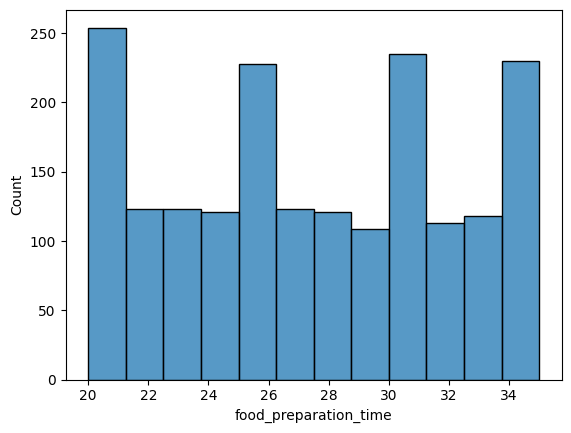

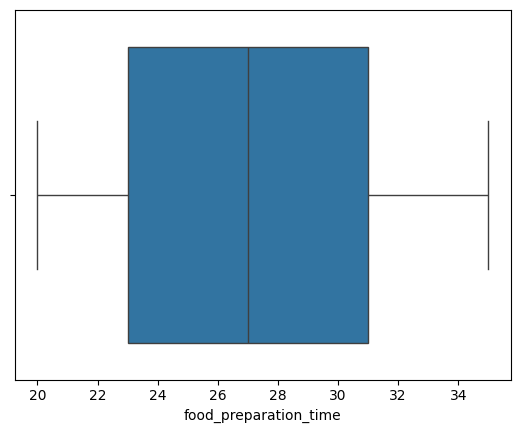

In [ ]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

- There is a normal distribution of food preparation time.
- 25% of the orders took more than 31 minutes to prepare and 25% of the orders took less than 23 minutes to prepare.
- 50% of the orders took between 23 and 31 minutes to prepare.

#### **Observations on Delivery Time**

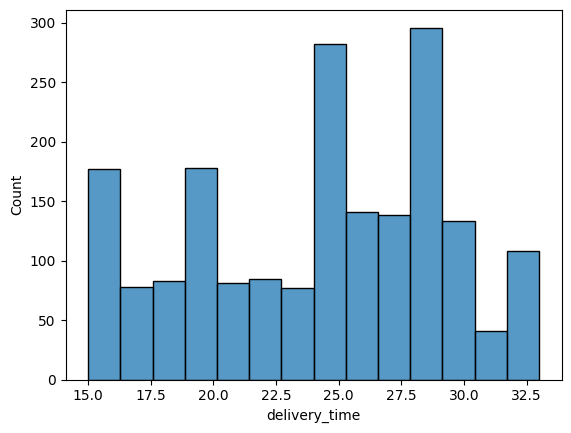

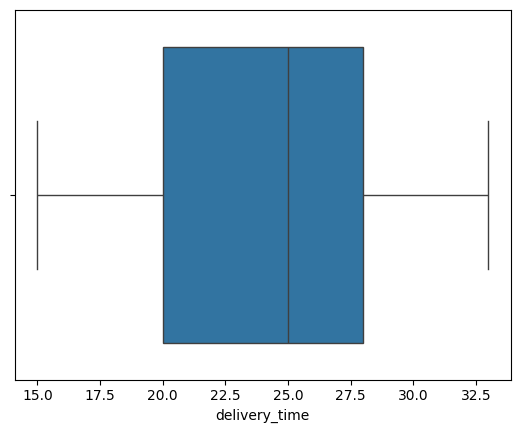

In [ ]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

- The delivery time is slightly left skewed.
- Half of the orders took more than 25 minutes to deliver, and half of the orders took less than 25 minutes to deliver.
- The fastest delivery time was 15 minutes.

#### Observations on Cuisine Type

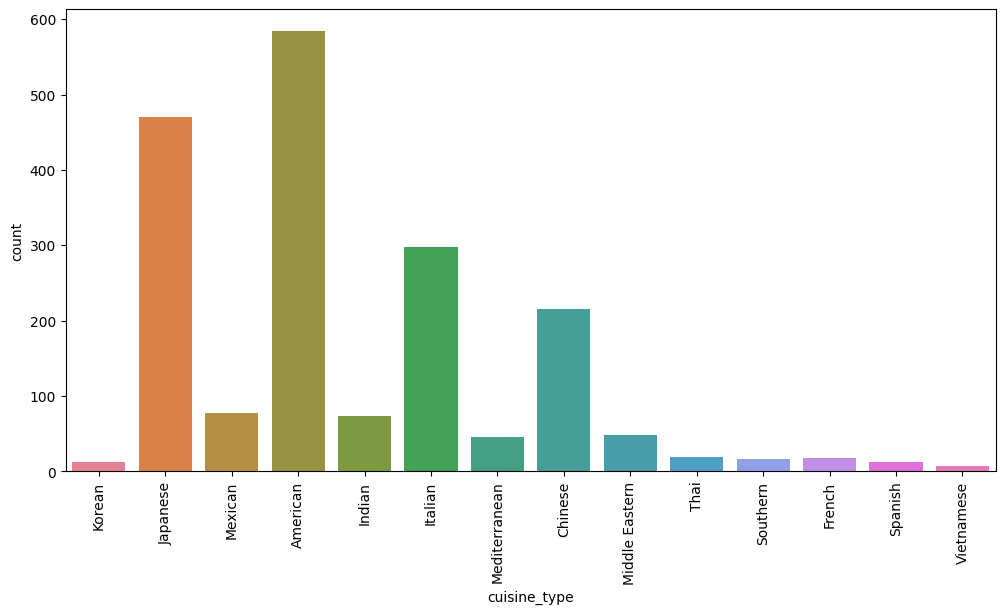

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='cuisine_type', hue='cuisine_type')
plt.xticks(rotation=90)
plt.show()

- American, Japanese, Italian, and Chinese are the most popular types of cuisines and account for the majority of orders.

#### **Observations on Day of the Week**

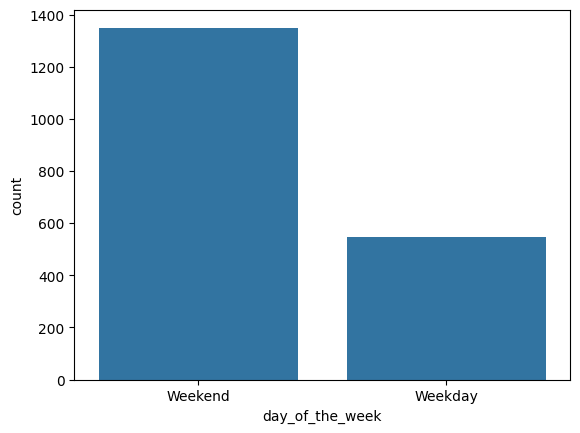

In [ ]:
sns.countplot(data=df,x='day_of_the_week')
plt.show()

- There are more than double the amount of orders on the weekend versus a weekday.
- We can clearly see that people prefer to order food delivery on the weekend.

#### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:
- The top 5 restaurants in terms of orders received is Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.
- Shake Shack had the most orders with 219.
- There is a much larger gap in number of orders between the top 2 compared to the other top restaurants.

#### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
df.loc[df['day_of_the_week']=='Weekend','cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

In [ ]:
df.loc[df['day_of_the_week']=='Weekend','cuisine_type'].value_counts(normalize=True)

American          0.307180
Japanese          0.247964
Italian           0.153220
Chinese           0.120651
Mexican           0.039230
Indian            0.036269
Mediterranean     0.023686
Middle Eastern    0.023686
Thai              0.011103
French            0.009623
Korean            0.008142
Southern          0.008142
Spanish           0.008142
Vietnamese        0.002961
Name: cuisine_type, dtype: float64

#### Observations:
- The majority of orders on the weekend were for American cuisine and accounted for about 31 percent of all weekend orders.
- Vietnamese was the least popular, accounting for only about 0.3% of all weekend orders.

#### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
df['cost_of_the_order'].count()

1898

In [ ]:
# filter orders over 20 dollars and assign it to a variable
num_orders_over_20 = df['cost_of_the_order'][df['cost_of_the_order']>20].count()

# assign total number of orders to a variable
num_orders = df['cost_of_the_order'].count()

# calculate percentage of orders over 20 dollars
print(((num_orders_over_20/num_orders)*100).round(1), "percent of the orders are over 20 dollars.")

29.2 percent of the orders are over 20 dollars.


#### Observations:
- 29.2 percent of the orders are over 20 dollars.

#### **Question 10**: What is the mean order delivery time?

In [ ]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
- The mean order delivery time is 24.16 minutes

#### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# get counts of unique customer IDs in order from most frequent to least frequent
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observations:
- Customer 52832 had the most orders with 13.
- Customer 47440 had the 2nd most orders with 10.
- Customer 83287 had the 3rd most orders with 9.

### Multivariate Analysis

#### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


#### **Comparing the numerical variables**

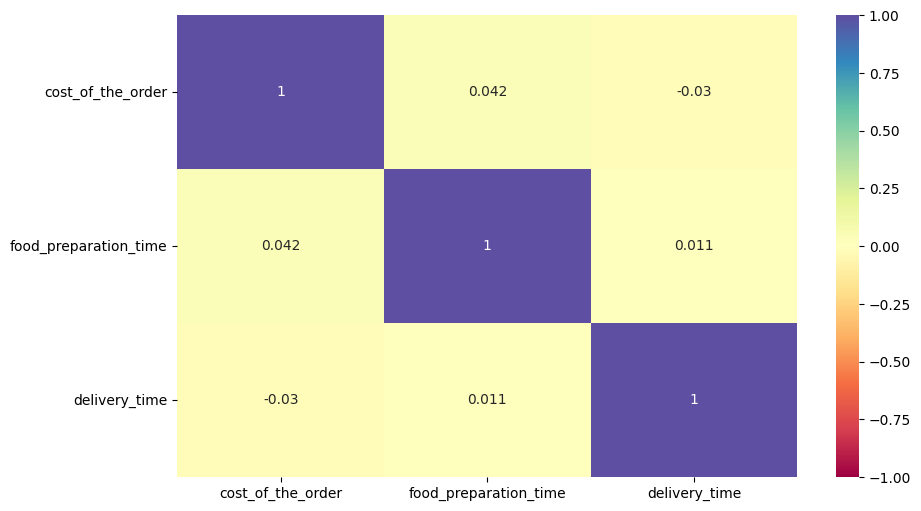

In [44]:
num_var = ['cost_of_the_order','food_preparation_time','delivery_time']
corr = df[num_var].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.yticks(rotation=0)
plt.show()

- According to the heatmap, there doesn't seem to be much correlation between cost of the order, rating, food preparation time, and delivery time.

#### **Cuisine vs Food Preparation Time**

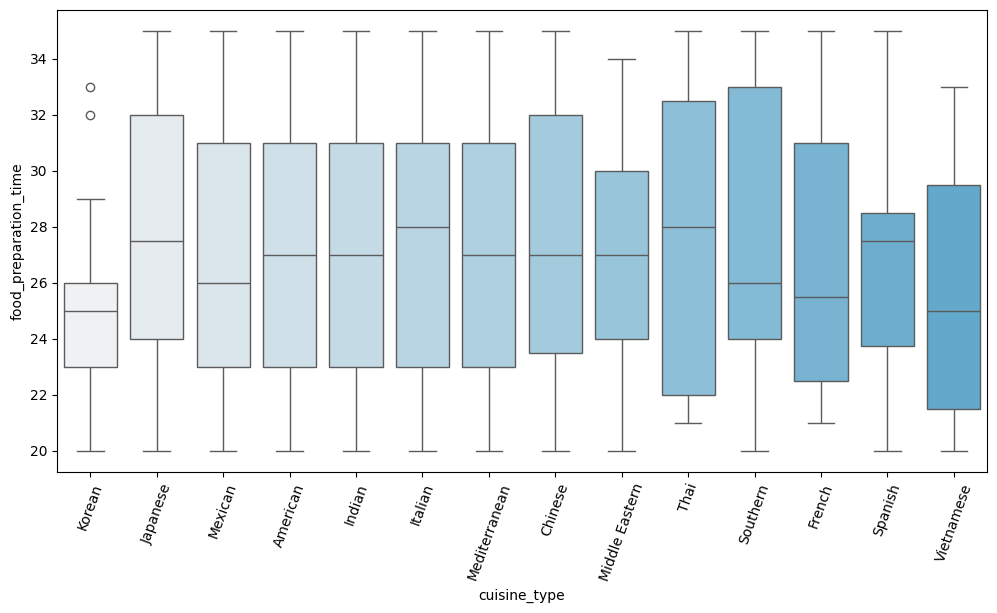

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', hue='cuisine_type', palette='light:#51AFDE')
plt.xticks(rotation=70)
plt.show()

- Food preparation time is fairly consistent between most types of cuisine.
- Korean food has a significantly lower preparation time than the rest of the cuisines, however there are some outliers.
- The median food preparation time for all cuisines is about 25-28 minutes.

-

#### **Cuisine vs Cost of the Order**

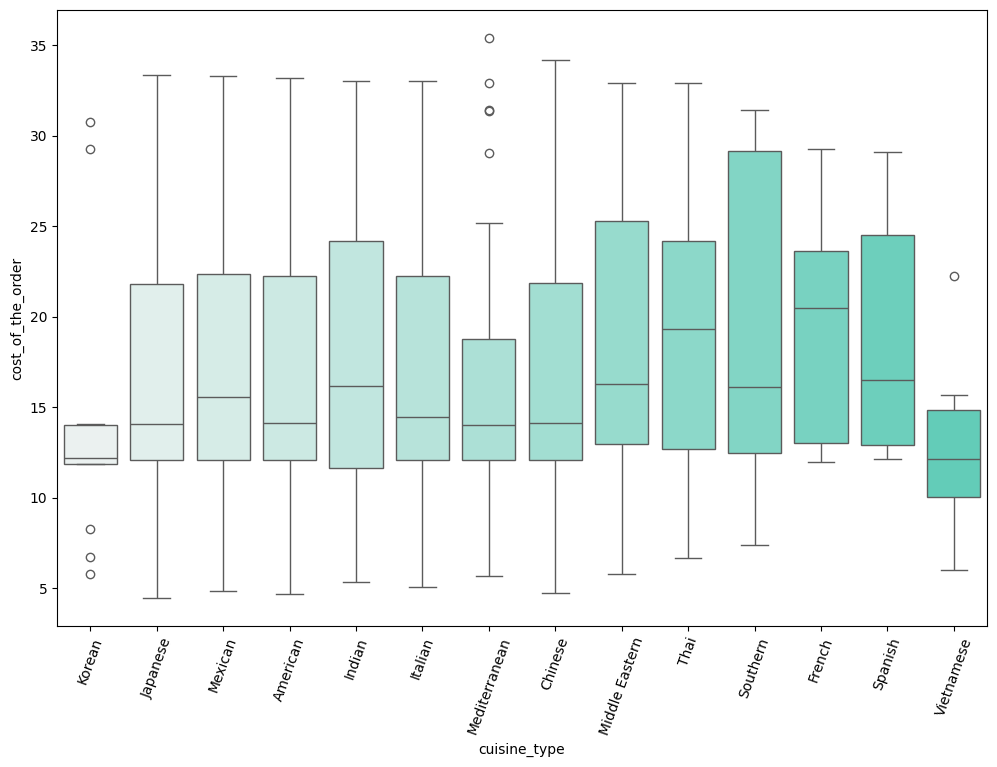

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='cuisine_type', palette='light:#51DEC3')
plt.xticks(rotation=70)
plt.show()

- Korean and Vietnamese cuisines have a significantly lower cost of order compared to the rest of the cuisines.
- Mediterranean cuisine has a slightly lower maximum cost of order compared to the rest of the cuisines, however there are several outliers.
- Most cuisines have a median order cost between 12 and 20 dollars.

#### **Day of the Week vs Delivery Time**

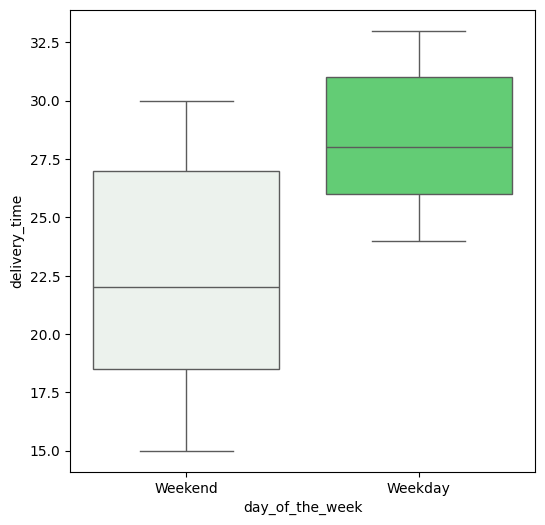

In [35]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', hue='day_of_the_week', palette='light:#51DE6A')
plt.show()

- Weekdays, on average, have a higher delivery time.

#### **Average Rating by Cuisine**

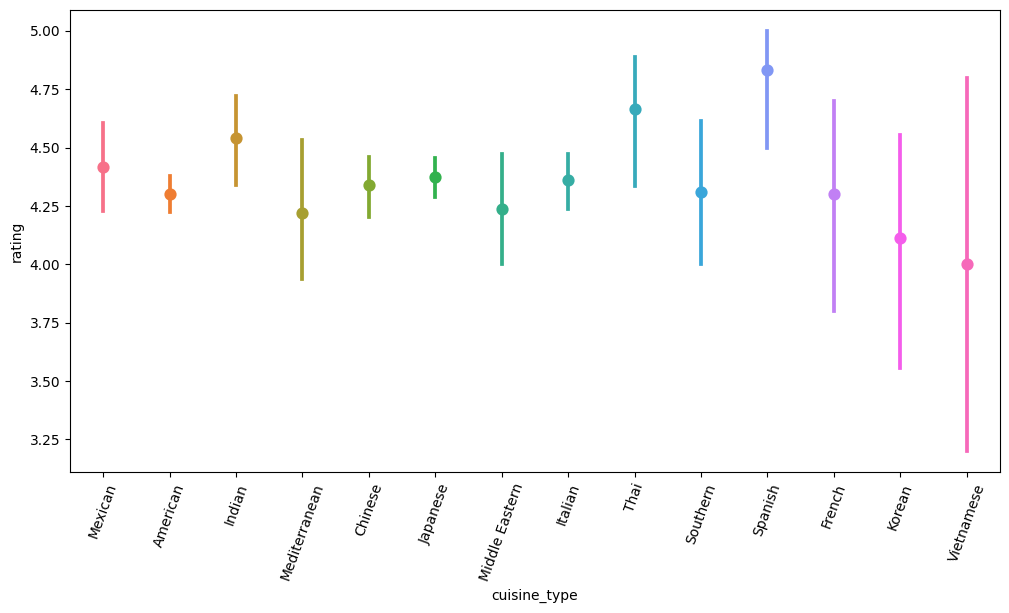

In [66]:
# filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()
# convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

plt.figure(figsize=(12,6))
sns.pointplot(data=df_rated, x='cuisine_type', y='rating', hue='cuisine_type')
plt.xticks(rotation=70)
plt.show()

- Spanish, Thai, and Indian are the 3 highest rated cuisines on average.
- Vietnamese has the widest range of ratings.
- All cuisines have an average rating of over 4.

#### **Rating vs Delivery Time**

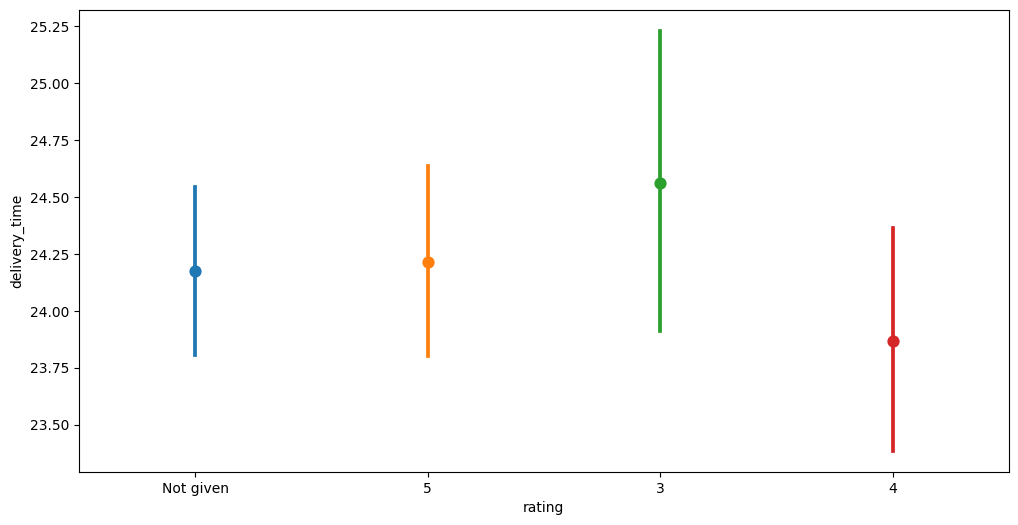

In [54]:
plt.figure(figsize=(12,6))
sns.pointplot(data=df, x='rating', y='delivery_time', hue='rating')
plt.show()

- The lowest rating given, which is 3, is associated with higher average delivery times.

#### **Rating vs Cost of the Order**

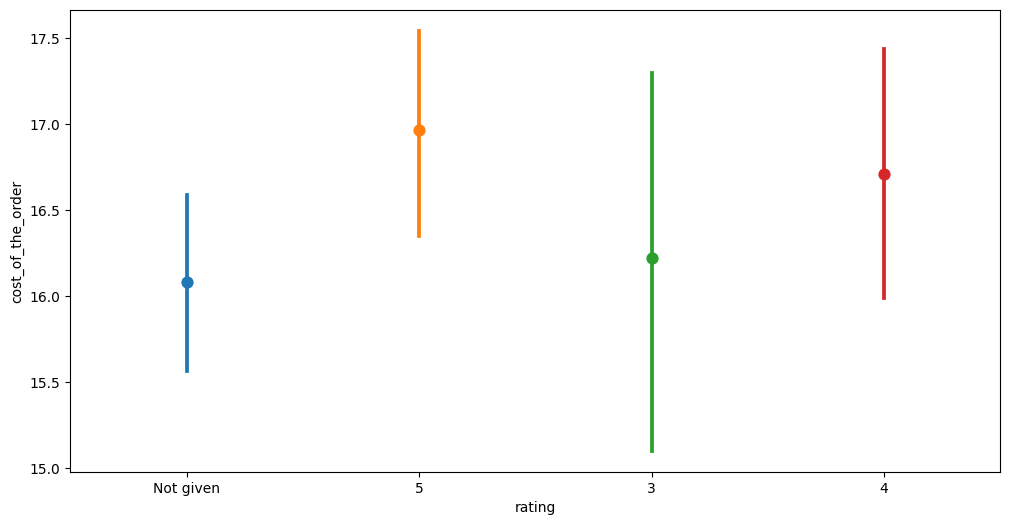

In [57]:
plt.figure(figsize=(12,6))
sns.pointplot(data=df, x='rating', y='cost_of_the_order', hue='rating')
plt.show()

- Higher ratings correlate with a higher cost of the order.

#### **Revenue by Restaurant**

In [37]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False).head(15)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Momoya                            492.13
Name: cost_of_the_order, dtype: float64

- There are 14 restaurants listed above that are generating more than $500 of revenue.

#### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [58]:
# filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()
# convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')
# create dataframe containing restaurant names and their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [59]:
# get restaurant names that have rating count > 50
restaurant_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']
# filter to get the data of restaurants that have rating > 4
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(restaurant_names)].copy()
# find the mean rating of restaurants
df_mean_4.groupby(df_mean_4['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
- The 4 restaurants above have over 50 ratings and an average rating of over 4.

#### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

Total cost of orders greater than 20 dollars:  $14754.91
Total cost of orders between 5 and 20 dollars:  $16517.17

------------------------------------------------------------------

Revenue from orders over 20 dollars:  $3688.73
Revenue from orders between 5 and 20 dollars:  $2477.58

------------------------------------------------------------------

The net revenue generated by the company across all orders is $6166.3

------------------------------------------------------------------



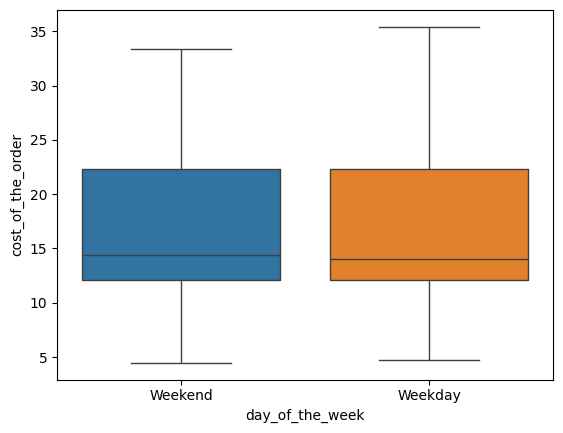

In [60]:
# get the sum of orders over 20 dollars and orders between 5 and 20 dollars, and put them in separate variables
total_orders_over_20 = df['cost_of_the_order'][df['cost_of_the_order'] > 20].sum()
total_orders_5_to_20 = df['cost_of_the_order'][(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)].sum()

print('Total cost of orders greater than 20 dollars:  $' + str(round(total_orders_over_20, 2)))
print('Total cost of orders between 5 and 20 dollars:  $' + str(round(total_orders_5_to_20, 2)))
print('\n------------------------------------------------------------------\n')

# add variables for revenue on each commission level
revenue_over_20 = total_orders_over_20 * 0.25
revenue_5_to_20 = total_orders_5_to_20 * 0.15

print('Revenue from orders over 20 dollars:  $' + str(round(revenue_over_20, 2)))
print('Revenue from orders between 5 and 20 dollars:  $' + str(round(revenue_5_to_20, 2)))
print('\n------------------------------------------------------------------\n')

# find total net revenue
total_revenue = revenue_over_20 + revenue_5_to_20

print('The net revenue generated by the company across all orders is $' + str(round(total_revenue, 2)))
print('\n------------------------------------------------------------------\n')

# compare cost of orders between weekdays and weekends
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order', hue='day_of_the_week')
plt.show()

#### Observations:
- The company generated $6166.30 dollars from all orders.
- The company had a greater total dollar amount of orders between 5 and 20 dollars, however the company made more money overall from orders over 20 dollars.
- The majority of orders cost between 12 and 22 dollars.
- The maximum cost of orders is slightly higher on weekdays.



#### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

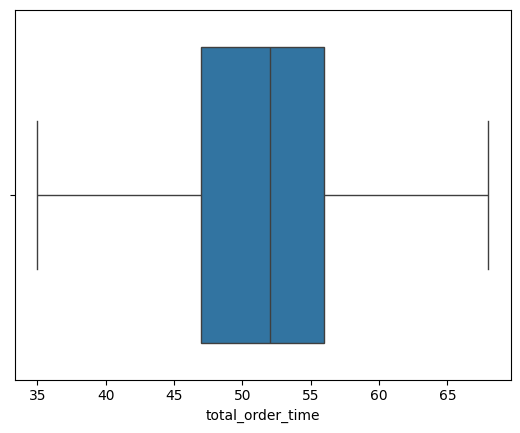

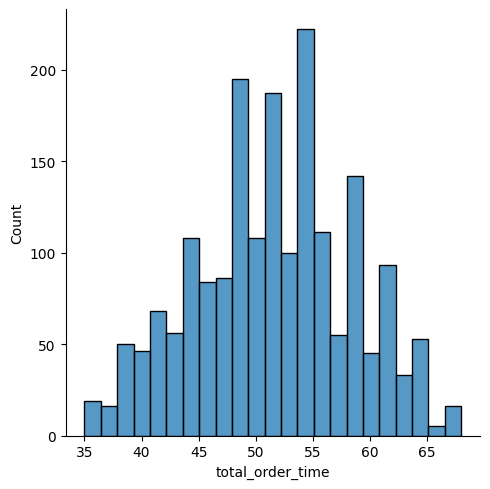

Out of 1898 orders, there were 200 orders that took over 60 minutes to get delivered.


10.54% of orders took over 60 minutes to get delivered.


In [61]:
# create column for total order time (food prep time + delivery time)
df['total_order_time'] = df['food_preparation_time']+df['delivery_time']

# visualize total order time
sns.boxplot(data=df, x='total_order_time')
plt.show()
sns.displot(data=df, x='total_order_time')
plt.show()

# get total orders and orders over 60 minutes
order_count = len(df)
long_orders = df['total_order_time'][df['total_order_time'] > 60].count()

print('Out of', order_count, 'orders, there were', long_orders, 'orders that took over 60 minutes to get delivered.')
print('\n')

# get percentage of orders over 60 minutes
print(str(round((long_orders/order_count)*100, 2)) + '% of orders took over 60 minutes to get delivered.')

#### Observations:
- The majority of orders take between 47 and 56 minutes to get delivered.
- Only about 10% of the orders took over 60 minutes to get delivered.

#### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


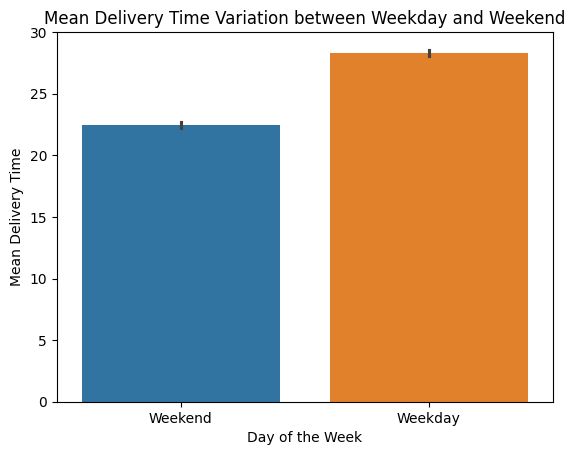

In [62]:
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()
print(mean_delivery_time)


sns.barplot(data=df, x='day_of_the_week', y='delivery_time', hue='day_of_the_week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Delivery Time')
plt.title('Mean Delivery Time Variation between Weekday and Weekend')
plt.show()

#### Observations:
- On average, delivery time during the weekdays is longer than the weekends.

## Conclusion and Recommendations

### Conclusions:
- American and Japanese are the 2 most popular cuisines, while Spanish and Thai are the 2 highest rated cuisines.
- We can see that there is a positive correlation between the average rating of cuisine and the average order cost.
- Delivery time is higher on weekdays which could be due to large catering orders for companies, or more traffic.
- Just over 1/3 of orders were not rated.

### Recommendations:

- FoodHub should prioritize partnering with the most popular cuisines (American and Japanese) as they will likely bring in more orders on average.
- The company should investigate why so many customers do not leave a rating, and come up with a solution to incentivize customers to leave ratings.
- Since there were about 11% of orders that took over 60 minutes of total delivery time, FoodHub should consider incentives to reduce the delivery time. For example, they could give restaurants an extra bonus % on orders that took less than 30 minutes of preparation time, as well as bonuses for delivery drivers that took less than 20 minutes to deliver the food.